# South African Language Identification!


## EDSA 2021 Classification Hackation

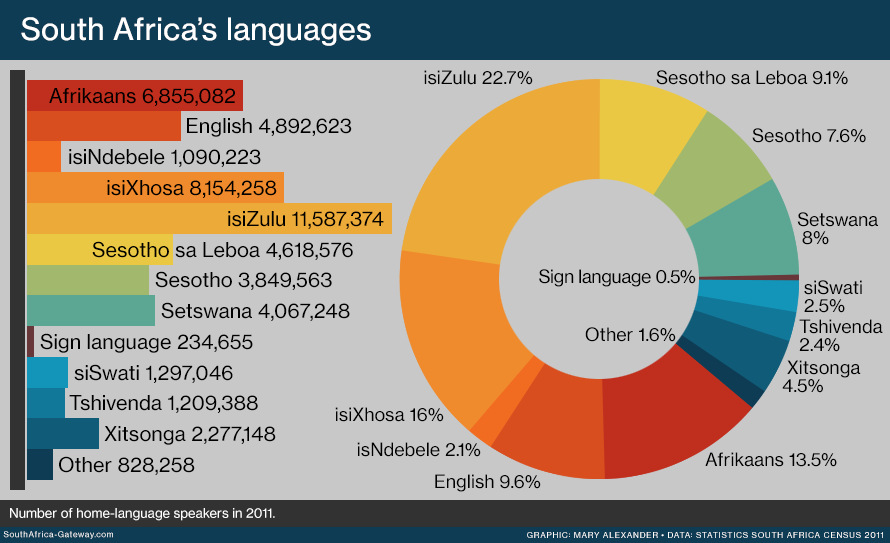

## Introduction
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

 # 1. Loading Libraries
 All Python capabilities are not loaded into our working environment by default (even those that are already installed in your system). So, we import each and every library that we want to use.

In [72]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split

In [73]:
train_data = pd.read_csv("train_set.csv")
train_data.head(10)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [74]:
train_data["lang_id"].value_counts()

afr    3000
sot    3000
ssw    3000
zul    3000
tsn    3000
nso    3000
nbl    3000
tso    3000
eng    3000
xho    3000
ven    3000
Name: lang_id, dtype: int64

In [75]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [76]:
train_data.shape

(33000, 2)

In [77]:
langid = train_data['lang_id'].unique()
langid

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

In [78]:
Number_of_Languages = len(langid)
print(Number_of_Languages)

11


# 2. Separating Independent and Dependent features
Separating the dependent and independent variables, here text data is the independent variable and the language name is the dependent variable.

In [79]:
X = train_data["text"]
y = train_data["lang_id"]

# 3. Label Encoding
The output variable, the name of languages is a categorical variable. For training the model we should have to convert it into a numerical form, so we are performing label encoding on that output variable. For this process, we are importing LabelEncoder from sklearn.

In [80]:
#le = LabelEncoder()
y = LabelEncoder().fit_transform(y)

# 4. Text Preprocessing
Text preprocessing technique was used to remove unwanted symbols, numbers which may affect the quality of our model.

In [81]:
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [82]:
data_list

['umgaqo-siseko we za amalu giselelo kumaziko axhasa ulawulo lwesi i zi ku ye  okuthath i xaxheba kwabafazi ezi ziquka phakathi kwezi ye zazo ikomisho i yokuli ga a  gokwesi i ikomisho i yamalu gelo olu tu lomza tsi afrika',
 'i-dha iya kuba  obulumko bokubeka umsebe zi  aphi  a kwisebe  gokusekwe kwiimfu o zokusebe za zalo emva kokubo a a  omsebe zi ku ye oka ye ima ya o yakhe ukuba ula dulo lom tu o jalo alufa eleka ga i-dha mayibize u cedo olufa elekileyo elu gelwe i layo',
 'the provi ce of kwazulu- atal departme t of tra sport i vites te ders from established co tractors experie ced i  bridge co structio  for the co structio  of the kwajolwayo tugela river pedestria  bridge  ear tugela ferry the duratio  of the project will be mo ths',
 'o  etefatša gore o ba file dilo ka moka tše le dumelela ego ka tšo a mohlala maleri a magolo a a šomišwago go fihlelela meago g e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj',
 'khomishi i ya  di ga yiso

# 3. Bag of Words
The Bag-of-words model is mainly used as a tool of feature generation. After transforming the text into a "bag of words", we can calculate various measures to characterize the tex

In [83]:
cv = CountVectorizer()
X = cv.fit_transform(data_list)

# 4. Model Training and Validation

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#cm = confusion_matrix(y_test, y_pred)
print('Accuracy Score is: ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score is : ' ,precision_score(y_test,y_pred, average='weighted'))
print('Recall Score is: ',recall_score(y_test,y_pred, average='weighted'))
print('F1 Score is: ', f1_score(y_test, y_pred, average='weighted'))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))


Accuracy Score is: 0.9989393939393939
Precision Score is :  0.9989406710596321
Recall Score is:  0.9989393939393939
F1 Score is:  0.9989396579348165
Confusion Matrix : 
[[616   0   0   0   0   0   0   0   0   0   0]
 [  0 604   0   0   0   0   0   0   0   0   0]
 [  0   0 554   0   0   0   0   0   0   0   2]
 [  0   0   0 620   1   0   0   0   0   0   0]
 [  0   0   0   0 607   0   0   0   0   0   0]
 [  0   0   0   0   0 615   0   0   0   0   0]
 [  1   0   0   0   0   0 606   0   0   0   0]
 [  0   0   0   0   0   0   0 613   0   0   0]
 [  0   0   0   0   0   0   0   0 575   0   0]
 [  0   0   0   0   0   0   0   0   0 605   1]
 [  0   0   2   0   0   0   0   0   0   0 578]]
